In [2]:
import pandas
import konlpy
import gensim
import tensorflow as tf
import numpy as np
np.set_printoptions(linewidth = 200)

print(pandas.__version__)
print(konlpy.__version__)
print(gensim.__version__)

1.3.3
0.5.2
4.1.2


In [3]:
import pandas as pd

# 데이터를 읽어봅시다. 
train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [4]:
#데이터의 중복 제거
#NaN 결측치 제거
#한국어 토크나이저로 토큰화
#불용어(Stopwords) 제거
#사전word_to_index 구성
#텍스트 스트링을 사전 인덱스 스트링으로 변환
#X_train, y_train, X_test, y_test, word_to_index 리턴

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [7]:
DF = pd.concat([train_data, test_data], axis = 0, ignore_index = True)
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        200000 non-null  int64 
 1   document  199992 non-null  object
 2   label     200000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [8]:
print(DF.isnull().sum())

id          0
document    8
label       0
dtype: int64


In [9]:
DF = DF.dropna(how = 'any')
print(DF.isnull().sum())

id          0
document    0
label       0
dtype: int64


In [10]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199992 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        199992 non-null  int64 
 1   document  199992 non-null  object
 2   label     199992 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.1+ MB


In [11]:
DF_X = DF.iloc[:, 1]
DF_X[:4]

0                  아 더빙.. 진짜 짜증나네요 목소리
1    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                    너무재밓었다그래서보는것을추천한다
3        교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
Name: document, dtype: object

In [12]:
sentences = [sentence.split(' ') for sentence in DF_X]
sentences[:4]

[['아', '더빙..', '진짜', '짜증나네요', '목소리'],
 ['흠...포스터보고', '초딩영화줄....오버연기조차', '가볍지', '않구나'],
 ['너무재밓었다그래서보는것을추천한다'],
 ['교도소', '이야기구먼', '..솔직히', '재미는', '없다..평점', '조정']]

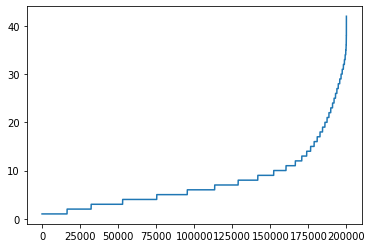

In [13]:
import matplotlib.pyplot as plt

sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()

plt.plot(sentence_len)
plt.show()

In [14]:
print(sum([int(i <= 32) for i in sentence_len]))

198643


In [16]:
sentences_new = []

for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:32])

sentences = sentences_new
sentences[:4]

[['아', '더빙..', '진짜', '짜증나네요', '목소리'],
 ['흠...포', '초딩영화줄', '가볍지', '않구나'],
 ['너무재밓었'],
 ['교도소', '이야기구먼', '..솔직히', '재미는', '없다..평', '조정']]

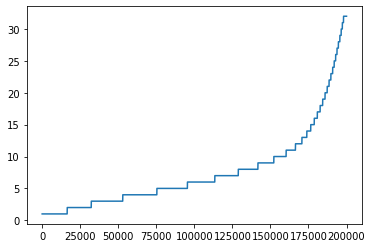

In [17]:
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()

plt.plot(sentence_len)
plt.show()

In [18]:
y = DF.iloc[:, 2]
len(y)

199992

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = 20000)
tokenizer.fit_on_texts(sentences)
TV_X = tokenizer.texts_to_sequences(sentences)
TV_X[:5]

[[52, 4, 6732, 1107], [7368], [], [14748, 330, 13499], [93, 5596, 791, 485]]

In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

TV_X = pad_sequences(TV_X,
                     maxlen = 32,
                     padding = 'post')
print(TV_X[:5])

[[   52     4  6732  1107     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0]
 [ 7368     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0]
 [14748   330 13499     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0]
 [   93  5596   791   485     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0]]


In [23]:
TV_X.shape

(199992, 32)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(TV_X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 2045)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((139994, 32), (139994,), (59998, 32), (59998,))

In [26]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Embedding(input_dim = 20000, 
                           output_dim = 256))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 256)         5120000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                36992     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 5,157,025
Trainable params: 5,157,025
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

In [28]:
%%time

history = model.fit(X_train, y_train, 
                    epochs = 20, 
                    batch_size = 128, 
                    validation_data = (X_test, y_test))

Epoch 1/20
1094/1094 [==============================] - 16s 7ms/step - loss: 0.4797 - accuracy: 0.7507 - val_loss: 0.4127 - val_accuracy: 0.7966
Epoch 2/20
1094/1094 [==============================] - 8s 7ms/step - loss: 0.3603 - accuracy: 0.8223 - val_loss: 0.4195 - val_accuracy: 0.7953
Epoch 3/20
1094/1094 [==============================] - 8s 7ms/step - loss: 0.3139 - accuracy: 0.8401 - val_loss: 0.4401 - val_accuracy: 0.7931
Epoch 4/20
1094/1094 [==============================] - 8s 7ms/step - loss: 0.2789 - accuracy: 0.8528 - val_loss: 0.4852 - val_accuracy: 0.7831
Epoch 5/20
1094/1094 [==============================] - 7s 7ms/step - loss: 0.2497 - accuracy: 0.8671 - val_loss: 0.5016 - val_accuracy: 0.7865
Epoch 6/20
1094/1094 [==============================] - 8s 7ms/step - loss: 0.2232 - accuracy: 0.8808 - val_loss: 0.5862 - val_accuracy: 0.7837
Epoch 7/20
1094/1094 [==============================] - 8s 7ms/step - loss: 0.2025 - accuracy: 0.8906 - val_loss: 0.6451 - val_accuracy

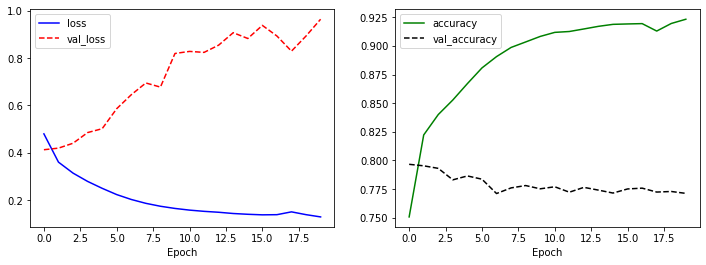

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [48]:
from gensim.models.keyedvectors import Word2VecKeyedVectors
word2vec_file_path = '~/data/word2vec_ko.model'
word_vectors = Word2VecKeyedVectors.load(word2vec_file_path)
vector = word_vectors.wv['끝']

FileNotFoundError: [Errno 2] No such file or directory: '~/data/word2vec_ko.model.wv.vectors.npy'

In [ ]:
'''
이번 과정은 시간이 너무 오래걸리는 과정이었고, 문제를 하나하나 해결해나가는데 어려움을 겪었다.
최대한 복잡하지 않게 간단하게 코드를 작성하려고 했다.
중간에 주석을 많이 달지 못했고, 간단한 모델로 진행하려고 해서인지 몰라도
생각보다 결과가 좋지 않았다.
'''